CODE BLOCK: 1

In [2]:
# Import necessary libraries
import torch
import matplotlib.pyplot as plt
from torchsummary import summary
from model import Net, Net2
from utils import train_data, test_data, train, test, optimizer, scheduler, criterion

CODE BLOCK: 2

In [3]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
device = torch.device("cuda" if cuda else "cpu")

CUDA Available? False


CODE BLOCK: 3 & 4 - These blocks are now shifted to utils.py. The data instantiations in the next code block are called from there.

CODE BLOCK: 5

In [4]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data(), **kwargs)
train_loader = torch.utils.data.DataLoader(train_data(), **kwargs)

100%|██████████| 9912422/9912422 [00:02<00:00, 4608857.04it/s]


Extracting ../data\MNIST\raw\train-images-idx3-ubyte.gz to ../data\MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 7724998.01it/s]

Extracting ../data\MNIST\raw\train-labels-idx1-ubyte.gz to ../data\MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 4167010.45it/s]


Extracting ../data\MNIST\raw\t10k-images-idx3-ubyte.gz to ../data\MNIST\raw



100%|██████████| 4542/4542 [00:00<?, ?it/s]

Extracting ../data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ../data\MNIST\raw



CODE BLOCK: 6

C:\Users\01889W744\AppData\Local\Temp\ipykernel_38744\976560796.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


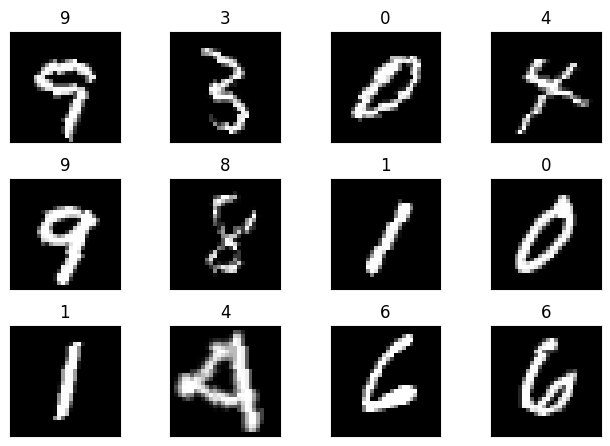

In [5]:
batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

CODE BLOCK: 7

In [6]:
model = Net().to(device)
summary(model, input_size=(1, 28, 28))
model = Net2().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 2

CODE BLOCK: 8

In [7]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

# test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

CODE BLOCK: 9
This block is now shifted to utils.py file and functions in next block call functions train and test from there.

CODE BLOCK: 10

In [12]:
model = Net().to(device)
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_acc, train_losses = train(model, device, train_loader, optimizer(model), criterion(), train_losses, train_acc)
  test_acc, test_losses = test(model, device, test_loader, criterion(), test_losses, test_acc)
  scheduler(model).step()

Epoch 1


  0%|          | 0/118 [00:00<?, ?it/s]

Train: Loss=2.2978 Batch_id=9 Accuracy=11.58:   8%|▊         | 10/118 [00:28<02:33,  1.42s/it]

CODE BLOCK: 11

In [ ]:
# Plot the training and test accuracy and loss
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

summary(model, input_size=(1, 28, 28))